# Enhanced protein isoform characterization through long-read proteogenomics 
## Supplementary Note 4
---
Ben Jordan | Gloria Sheynkman

In [1]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
import os, sys
import matplotlib

import config, data_loader
matplotlib.rc('font', **config.font)

# all plots go into a directory
if not os.path.exists('plot'):
    os.makedirs('plot')

# all statistics go into a directory
if not os.path.exists('stats'):
    os.makedirs('stats')

In [2]:

PG = data_loader.ProteinGroup()
protein_group = PG.pacbio_hybrid_protein_group
ms_found_accs = (
    protein_group['protein_group']
    .str.split('|')
    .explode()
    .unique()
)
# ms_found_accs = [a for a in ms_found_accs if a.startswith('PB.')]
# pacbio_database = pd.read_table(f'{config.PIPELINE_RESULTS_DIRECTORY}/protein_filter/{config.EXPERIMENT_NAME}.classification_filtered.tsv', usecols =['pb','CPM', 'pr_gene'])
pacbio_database = pd.read_table(f'{config.PIPELINE_RESULTS_DIRECTORY}/protein_gene_rename/{config.EXPERIMENT_NAME}_orf_refined_gene_update.tsv', usecols =['base_acc','CPM', 'pr_gene'])

pacbio_database['MS Detected'] = pacbio_database['base_acc'].isin(ms_found_accs)
pacbio_database['log2(CPM+1)'] = np.log2(pacbio_database['CPM']+1)
# pacbio_database = pacbio_database[pacbio_database['base_acc'].isin(data_loader.accs_in_hiconf_space)]
pacbio_database.to_csv('stats/FigS4.2_hybrid_db_isoforms_found_vs_not_found_in_mass_spec.tsv', sep='\t')

In [3]:
pacbio_database = pacbio_database[pacbio_database['CPM'] > 1]

In [4]:
# for zoom_level in ['zoom','full']:
#     fig, ax = plt.subplots(figsize=(4,3))
#     ax.hist(pacbio_database[pacbio_database['MS Detected']==True]['log2(CPM+1)'].to_list(), color='lightblue', alpha=0.6, edgecolor='black', bins=np.arange(0,15,0.5), label='MS detected')
#     ax.hist(pacbio_database[pacbio_database['MS Detected']==False]['log2(CPM+1)'].to_list(), color='orange', alpha=0.6, edgecolor='black', bins=np.arange(0,15,0.5), label='MS not detected')
#     ax.legend(prop={'size':12})
#     ax.set_xlabel('Transcript abundance ($log_2$(CPM+1))')
#     # ax.set_xlim(0, 13)
#     ax.set_ylabel('Number of protein isoforms')
#     if zoom_level == 'zoom':
#         ax.set_ylim(0, 1000)

#     plt.savefig(f"plot/FigS4.2_overlapped_hist_{zoom_level}_plot_cpm_distribution_isoforms_found_vs_not_found_in_mass_spec.pdf", bbox_inches='tight')
#     plt.axvline(x=np.log2(25+1), color='red')
#     plt.savefig(f"plot/FigS4.2_overlapped_hist_{zoom_level}_plot_cpm_distribution_isoforms_found_vs_not_found_in_mass_spec_with_cpm_vline.pdf", bbox_inches='tight')
#     plt.show()
#     plt.clf()



In [6]:


# gene_detect = pacbio_database.groupby('pr_gene').sum().reset_index()
# gene_detect['log2(CPM+1)'] = np.log2(gene_detect['CPM']+1)

# gene_detect['MS Detected'] = gene_detect['pr_gene'].isin(ms_found_genes)
# gene_detect.to_csv('stats/FigS4.2_genes_found_vs_not_found_in_mass_spec_with_cpm.tsv',sep='\t')

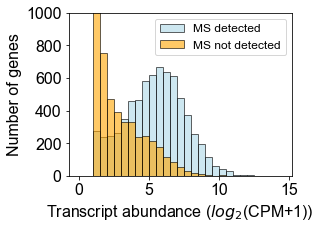

<Figure size 432x288 with 0 Axes>

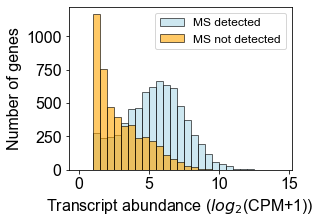

<Figure size 432x288 with 0 Axes>

In [11]:
ms_found_genes = (
    protein_group['pg_gene']
    .str.split('|')
    .explode()
    .unique()
)
gene_detect = pacbio_database.groupby('pr_gene').sum().reset_index()
gene_detect['log2(CPM+1)'] = np.log2(gene_detect['CPM']+1)

gene_detect['MS Detected'] = gene_detect['pr_gene'].isin(ms_found_genes)
gene_detect.to_csv('stats/FigS4.2_genes_found_vs_not_found_in_mass_spec_with_cpm_all.tsv',sep='\t')

for zoom_level in ['zoom','full']:
    fig, ax = plt.subplots(figsize=(4,3))
    ax.hist(gene_detect[gene_detect['MS Detected']==True]['log2(CPM+1)'].to_list(), color='lightblue', alpha=0.6, edgecolor='black', bins=np.arange(0,15,0.5), label='MS detected')
    ax.hist(gene_detect[gene_detect['MS Detected']==False]['log2(CPM+1)'].to_list(), color='orange', alpha=0.6, edgecolor='black', bins=np.arange(0,15,0.5), label='MS not detected')
    ax.legend(prop={'size':12})
    ax.set_xlabel('Transcript abundance ($log_2$(CPM+1))')
    # ax.set_xlim(0, 13)
    ax.set_ylabel('Number of genes')
    if zoom_level == 'zoom':
        ax.set_ylim(0, 1000)

    plt.savefig(f"plot/FigS4.2_overlapped_hist_{zoom_level}_plot_cpm_distribution_genes_found_vs_not_found_in_mass_spec_all_genes.pdf", bbox_inches='tight')
    # plt.axvline(x=np.log2(25+1), color='red')
    # plt.savefig(f"plot/FigS4.2_overlapped_hist_{zoom_level}_plot_cpm_distribution_genes_found_vs_not_found_in_mass_spec_with_cpm_vline.pdf", bbox_inches='tight')
    plt.show()
    plt.clf()

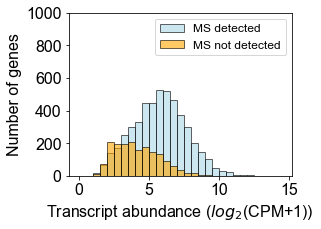

<Figure size 432x288 with 0 Axes>

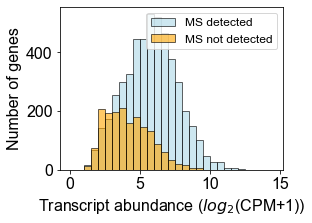

<Figure size 432x288 with 0 Axes>

In [10]:
pacbio_database_hc = pacbio_database[pacbio_database['base_acc'].isin(data_loader.accs_in_hiconf_space)]

gene_detect_hc = pacbio_database_hc.groupby('pr_gene').sum().reset_index()
gene_detect_hc['log2(CPM+1)'] = np.log2(gene_detect_hc['CPM']+1)

gene_detect_hc['MS Detected'] = gene_detect_hc['pr_gene'].isin(ms_found_genes)
gene_detect_hc.to_csv('stats/FigS4.2_genes_found_vs_not_found_in_mass_spec_with_cpm_high_confidence.tsv',sep='\t')

for zoom_level in ['zoom','full']:
    fig, ax = plt.subplots(figsize=(4,3))
    ax.hist(gene_detect_hc[gene_detect_hc['MS Detected']==True]['log2(CPM+1)'].to_list(), color='lightblue', alpha=0.6, edgecolor='black', bins=np.arange(0,15,0.5), label='MS detected')
    ax.hist(gene_detect_hc[gene_detect_hc['MS Detected']==False]['log2(CPM+1)'].to_list(), color='orange', alpha=0.6, edgecolor='black', bins=np.arange(0,15,0.5), label='MS not detected')
    ax.legend(prop={'size':12})
    ax.set_xlabel('Transcript abundance ($log_2$(CPM+1))')
    # ax.set_xlim(0, 13)
    ax.set_ylabel('Number of genes')
    if zoom_level == 'zoom':
        ax.set_ylim(0, 1000)

    plt.savefig(f"plot/FigS4.2_overlapped_hist_{zoom_level}_plot_cpm_distribution_genes_found_vs_not_found_in_mass_spec_high_confidence.pdf", bbox_inches='tight')
    # plt.axvline(x=np.log2(25+1), color='red')
    # plt.savefig(f"plot/FigS4.2_overlapped_hist_{zoom_level}_plot_cpm_distribution_genes_found_vs_not_found_in_mass_spec_with_cpm_vline.pdf", bbox_inches='tight')
    plt.show()
    plt.clf()

In [8]:
over_cutoff = pacbio_database[pacbio_database['CPM'] > 25].groupby('pr_gene').sum().reset_index()

In [9]:
over_cpm_threshold = gene_detect[gene_detect['CPM']>25].groupby('MS Detected').size().reset_index(name='Number of genes')
over_cpm_threshold['Percent'] = over_cpm_threshold['Number of genes'] / over_cpm_threshold['Number of genes'].sum() * 100
over_cpm_threshold.to_csv('stats/FigS4.2_over_25CPM_genes_MS_detected.tsv', sep = '\t', index=False)